In [5]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Загрузка и анализ набора данных
raw_dataset = pandas.read_csv('Набор_1_музеи_России.csv', sep=';')
raw_dataset.head(10) # Вывод первых 10 строк

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,Курганинский исторический музей,23093,4111,0,1,308,17.8,18
1,Таманский музейный комплекс,16451,5476,14625,7,314,102.2,40
2,Музей истории и краеведения г.Лабинска,21181,2016,0,1,247,28.3,18
3,Дом-музей А.Киселева г.Туапсе,3846,1196,5042,1,360,54.4,10
4,Красногвардейский историко-краеведческий музей,10778,6650,3183,2,247,7.9,5
5,Гиагинский районный краеведческий музей им.П....,17276,5434,4265,1,254,10.2,3
6,Краснодарский выставочный зал ИЗО,641,170,0,1,302,131.4,29
7,Краеведческий музей г.Адыгейска,3784,630,3784,1,254,2.7,2
8,Алтайский гос.мемориальный музей Г.С.Титова,7668,2430,1234,3,310,19.8,20
9,Колыванский музей истории камнерезного дела на...,1517,942,0,1,265,5.8,3


In [7]:
# Размер набора данных
print(raw_dataset.shape)

(2274, 8)


In [8]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

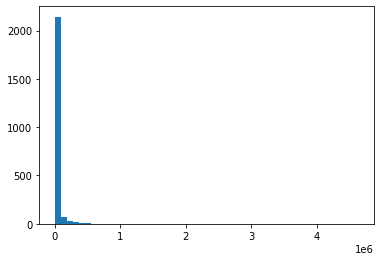

In [9]:
# Обработка данных в столбце №2 (base_fond (integer))

# Загружаем данные
data = raw_dataset['base_fond']

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

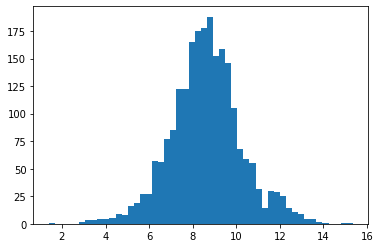

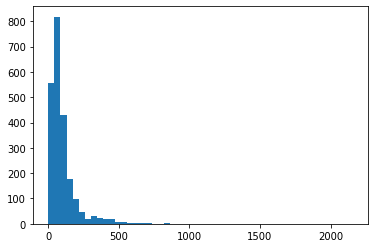

In [10]:
#Проблема 3 - неравномерное распределение, применим логарифм и квадратный корень
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [11]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [12]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

1.3862943611198906
15.351944780608079


In [13]:
# Приводим значения к интервалу N(0, 1), считая, что они ближе к нормальному распределению
scaler = StandardScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

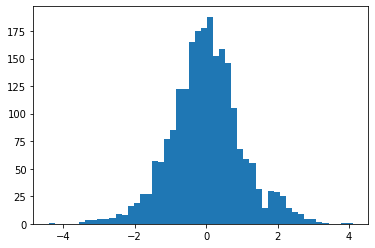

In [14]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

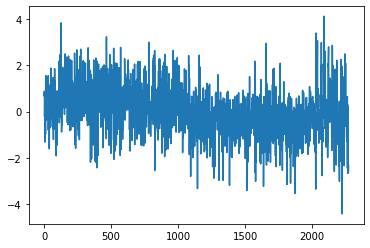

In [15]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [16]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [17]:
# Конвертируем в одномерный массив
data = data.flatten()

In [18]:
# Сохраняем в итоговом наборе данных
dataset['base_fond'] = data

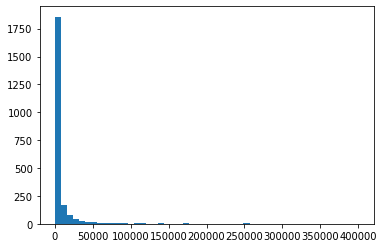

In [19]:
# Обработка данных в столбце №3 (science_fond (integer))

# Загружаем данные
data = raw_dataset['science_fond']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

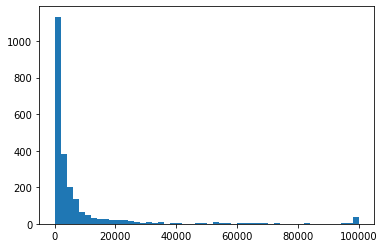

In [20]:
# Наблюдаем проблему №4 - Применяем отсечение с разрешенным интервалом от 0 до 100000.
data = numpy.clip(data, 0, 100000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

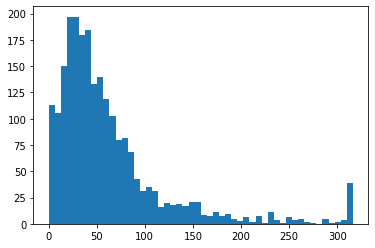

In [21]:
#Проблема 3 - неравномерное распределение, применим квадратный корень.
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [22]:
data = data ** 0.5
print(numpy.min(data))
print(numpy.max(data))

0.0
316.22776601683796


In [23]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

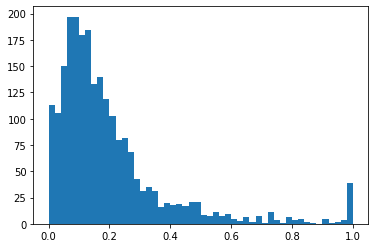

In [24]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

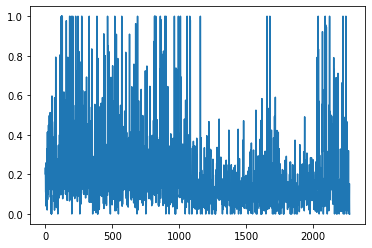

In [25]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [26]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [27]:
# Конвертируем в одномерный массив
data = data.flatten()

In [28]:
# Сохраняем в итоговом наборе данных
dataset['science_fond'] = data

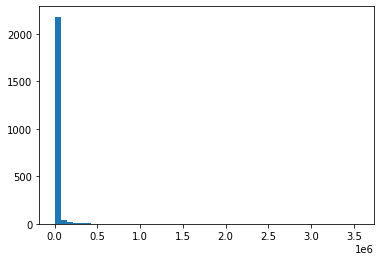

In [29]:
# Обработка данных в столбце №3 (ams (integer))

# Загружаем данные
data = raw_dataset['ams']

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

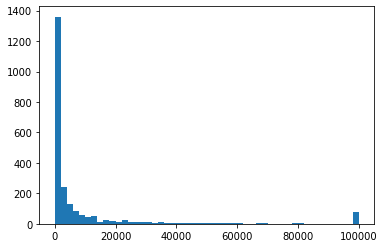

In [30]:
# Наблюдаем проблему №4 - Применяем отсечение с разрешенным интервалом от 0 до 100000.
data = numpy.clip(data, 0, 100000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

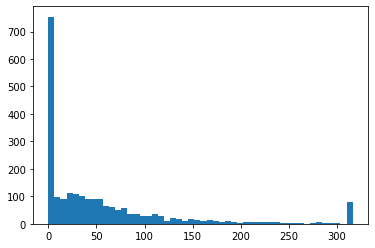

In [31]:
#Проблема 3 - неравномерное распределение, применим квадратный корень.
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [32]:
data = data ** 0.5
print(numpy.min(data))
print(numpy.max(data))

0.0
316.22776601683796


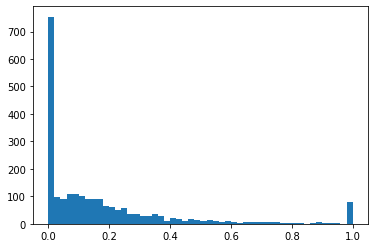

In [33]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

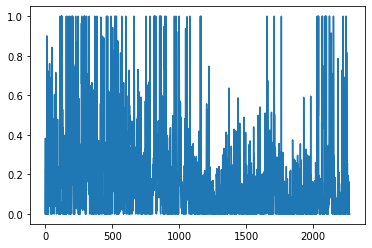

In [34]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [35]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [36]:
# Конвертируем в одномерный массив
data = data.flatten()

In [37]:
# Сохраняем в итоговом наборе данных
dataset['ams'] = data

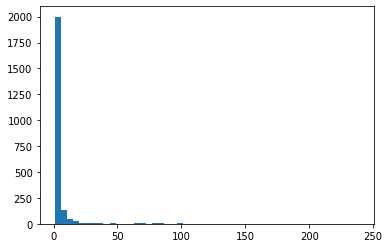

In [38]:
# Обработка данных в столбце №4 (n_buildings (integer))

# Загружаем данные
data = raw_dataset['n_buildings']

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

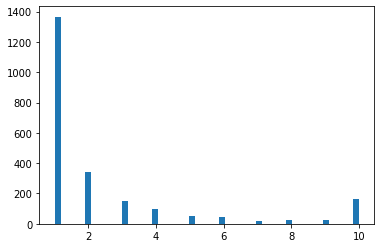

In [39]:
# Наблюдаем проблему №4 - Применяем отсечение с разрешенным интервалом от 0 до 10.
data = numpy.clip(data, 0, 10)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

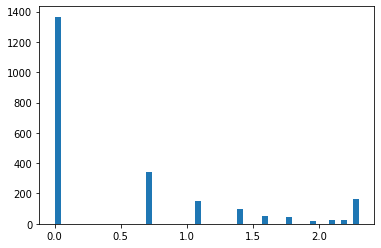

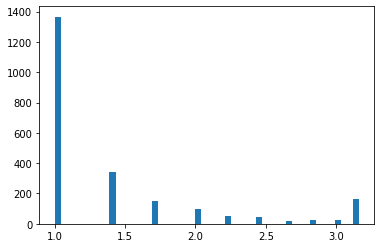

In [40]:
#Проблема 3 - неравномерное распределение, применим логарифм и квадратный корень
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [41]:
data = data ** 0.5
print(numpy.min(data))
print(numpy.max(data))

1.0
3.1622776601683795


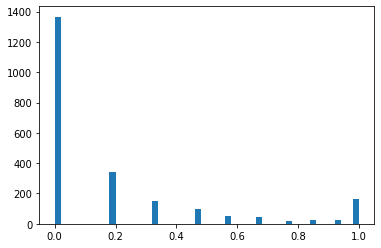

In [42]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

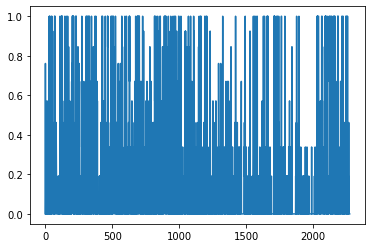

In [43]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [44]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [45]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['n_buildings'] = data

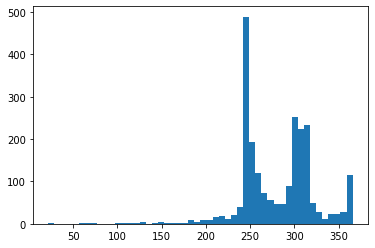

In [47]:
# Обработка данных в столбце №5 (n_days (integer))

# Загружаем данные
data = raw_dataset['n_days']

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

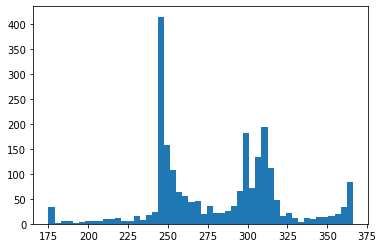

In [48]:
# Наблюдаем проблему №4 - Применяем отсечение с разрешенным интервалом от 175 до 366.
data = numpy.clip(data, 175, 366)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

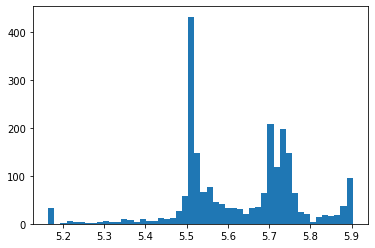

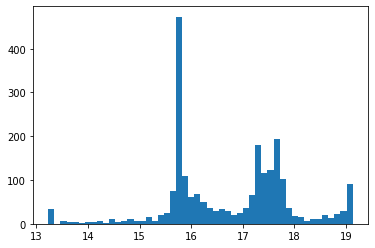

In [49]:
#Проблема 3 - неравномерное распределение, применим логарифм и квадратный корень
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [50]:
data = numpy.log(data)
print(numpy.min(data))
print(numpy.max(data))

5.1647859739235145
5.902633333401366


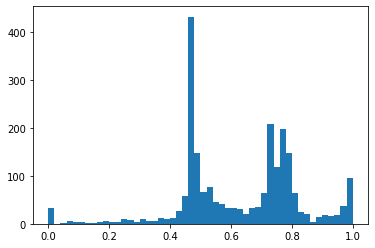

In [51]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

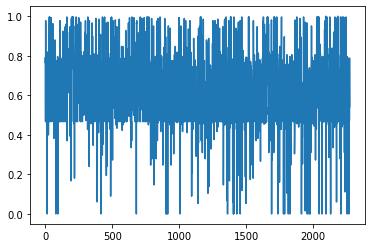

In [52]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [53]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [54]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['n_days'] = data

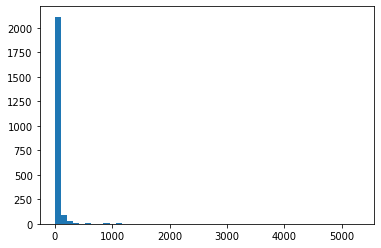

In [59]:
# Обработка данных в столбце №6 (guests (float))

# Загружаем данные
data = raw_dataset['guests']

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

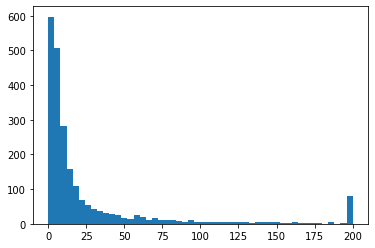

In [62]:
# Наблюдаем проблему №4 - Применяем отсечение с разрешенным интервалом от 0 до 200.
data = numpy.clip(data, 0, 200)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

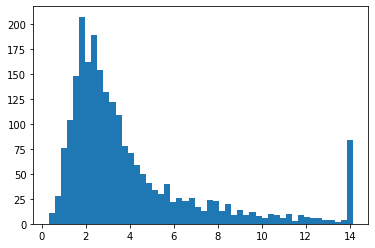

In [63]:
#Проблема 3 - неравномерное распределение, применим квадратный корень
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [64]:
data = data ** 0.5
print(numpy.min(data))
print(numpy.max(data))

0.31622776601683794
14.142135623730951


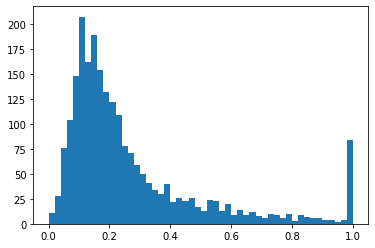

In [65]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

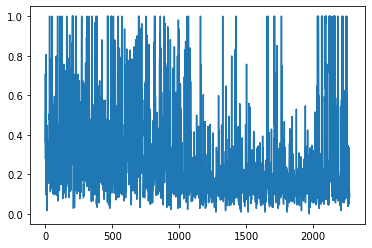

In [66]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [67]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['guests'] = data

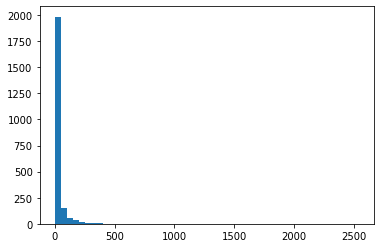

In [73]:
# Обработка данных в столбце №7 (employees (integer))

# Загружаем данные
data = raw_dataset['employees']

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

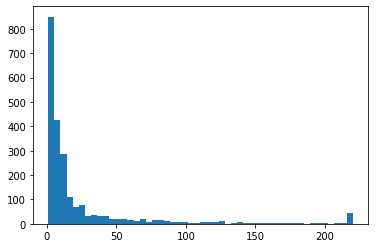

In [74]:
# Наблюдаем проблему №4 - Применяем отсечение с разрешенным интервалом от 0 до 220.
data = numpy.clip(data, 0, 220)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

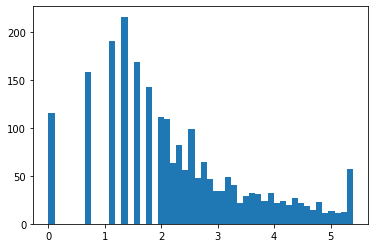

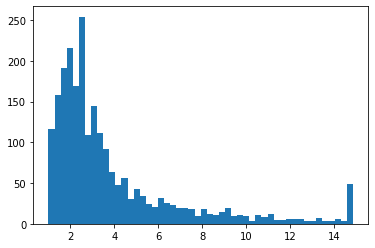

In [75]:
#Проблема 3 - неравномерное распределение, применим логарифм и квадратный корень
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [76]:
data = numpy.log(data)
print(numpy.min(data))
print(numpy.max(data))

0.0
5.393627546352362


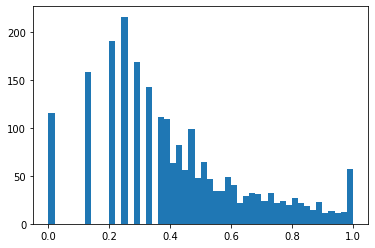

In [77]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

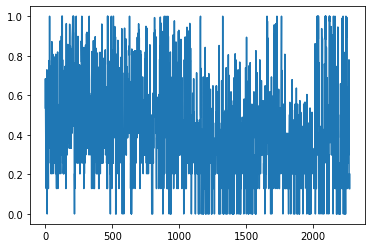

In [78]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [79]:
# Конвертируем в одномерный массив
data = data.flatten()
# Сохраняем в итоговом наборе данных
dataset['employees'] = data

In [80]:
print(dataset)

      base_fond  science_fond       ams  n_buildings    n_days    guests  \
0      0.871895      0.202756  0.000000     0.000000  0.766166  0.282280   
1      0.665213      0.234009  0.382426     0.761119  0.792314  0.708320   
2      0.819225      0.141986  0.000000     0.000000  0.467037  0.361896   
3     -0.220496      0.109362  0.224544     0.000000  0.977598  0.510593   
4      0.407500      0.257876  0.178410     0.191564  0.467037  0.180420   
...         ...           ...       ...          ...       ...       ...   
2269   0.210969      0.000000  0.162358     0.000000  0.693867  0.049456   
2270  -0.562293      0.104881  0.000000     0.000000  0.752901  0.128844   
2271  -2.495479      0.153069  0.000000     0.000000  0.472513  0.110494   
2272  -2.270869      0.009487  0.000000     0.000000  0.787991  0.098156   
2273  -2.573082      0.000000  0.000000     0.000000  0.541758  0.086819   

      employees  
0      0.535886  
1      0.683933  
2      0.535886  
3      0.426908

In [81]:
dataset.to_csv('prepared_data.csv')